##### **Alustava Analyysi..**
- Mitä enemmän tutkitaan dataa niin päivitetään tätä. Tämä ei ole kuitenkaan lopullinen raportti vaan yleiskatse ennen kuin aloitetaan..
- Tämän analyysin tarkoituksena on tutkia Iso-Britannian energian kulutuksen kaavoja ja tunnistaa siihen vaikuttavia keskeisiä tekijöitä. Datasetti tarjoaa tietoa talouksien energiankulutuksesta ja auttaa ymmärtämään, miten eri muuttujat, kuten ACORN-ryhmät, tariffisuunnitelmat ja sääolosuhteet, vaikuttavat kulutukseen.

In [6]:
#Lataa tarvittavat kirjastot tähään soluun
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # käytetään tiedostojen käsittelyyn ja hakemistojen hallintaan
from IPython.core.interactiveshell import InteractiveShell #tulostaa useamman tulosteen yhdellä kertaa 
InteractiveShell.ast_node_interactivity="all"
from datetime import datetime # aikaleimojen käsittelyyn 
import calendar # kalenterin käsittelyyn
import warnings # poistaa varoitusilmoitukset 
warnings.filterwarnings("ignore")

## **1.HOUSEHOLD INFO**

In [18]:
cleaned_household_info_path = "/Users/emre/Desktop/ai_da_jamk/currentai/data/processed/cleaned_household_info.csv"
cleaned_household_info = pd.read_csv(cleaned_household_info_path)

print(cleaned_household_info.info())
print(cleaned_household_info.describe())
print(cleaned_household_info.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566 entries, 0 to 5565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LCLid          5566 non-null   object
 1   stdorToU       5566 non-null   object
 2   Acorn          5566 non-null   object
 3   Acorn_grouped  5566 non-null   object
 4   file           5566 non-null   object
dtypes: object(5)
memory usage: 217.5+ KB
None
            LCLid stdorToU    Acorn Acorn_grouped     file
count        5566     5566     5566          5566     5566
unique       5566        2       19             5      112
top     MAC005492      STD  ACORN-E   High Income  block_0
freq            1     4443     1567          2192       50
       LCLid stdorToU    Acorn Acorn_grouped     file
0  MAC005492      TOU   ACORN-        ACORN-  block_0
1  MAC001074      TOU   ACORN-        ACORN-  block_0
2  MAC000002      STD  ACORN-A   High Income  block_0
3  MAC003613      STD  ACORN-A   Hi

In [ ]:
unique_values = {
    column: cleaned_household_info[column].unique() for column in cleaned_household_info.columns
}
print("Unique values in each column:") 
for column, values in unique_values.items():
    print(f"{column}: {values[:10]} (and {len(values)} total unique values)")


Unique values in each column:
LCLid: ['MAC005492' 'MAC001074' 'MAC000002' 'MAC003613' 'MAC003597' 'MAC003579'
 'MAC003566' 'MAC003557' 'MAC003553' 'MAC003482'] (and 5566 total unique values)
stdorToU: ['TOU' 'STD'] (and 2 total unique values)
Acorn: ['ACORN-' 'ACORN-A' 'ACORN-B' 'ACORN-C' 'ACORN-D' 'ACORN-E' 'ACORN-F'
 'ACORN-G' 'ACORN-H' 'ACORN-I'] (and 19 total unique values)
Acorn_grouped: ['ACORN-' 'High Income' 'Middle Income' 'Low Income' 'ACORN-U'] (and 5 total unique values)
file: ['block_0' 'block_1' 'block_2' 'block_3' 'block_4' 'block_5' 'block_6'
 'block_7' 'block_8' 'block_9'] (and 112 total unique values)


In [ ]:
categorical_columns = ['stdorToU', 'Acorn', 'Acorn_grouped'] 
for column in categorical_columns: 
    print(f"Frequency distribution of {column}:")
    print(cleaned_household_info[column].value_counts())
    print("\n")


Frequency distribution of stdorToU:
stdorToU
STD    4443
TOU    1123
Name: count, dtype: int64


Frequency distribution of Acorn:
Acorn
ACORN-E    1567
ACORN-Q     831
ACORN-F     684
ACORN-H     455
ACORN-L     342
ACORN-D     292
ACORN-G     205
ACORN-K     165
ACORN-A     157
ACORN-N     152
ACORN-C     151
ACORN-M     113
ACORN-J     112
ACORN-P     110
ACORN-O     103
ACORN-I      51
ACORN-U      49
ACORN-B      25
ACORN-        2
Name: count, dtype: int64


Frequency distribution of Acorn_grouped:
Acorn_grouped
High Income      2192
Low Income       1816
Middle Income    1507
ACORN-U            49
ACORN-              2
Name: count, dtype: int64




<Axes: title={'center': 'Frequency of Acorn Groups'}, xlabel='Acorn'>

Text(0.5, 0, 'Acorn')

Text(0, 0.5, 'Frequency')

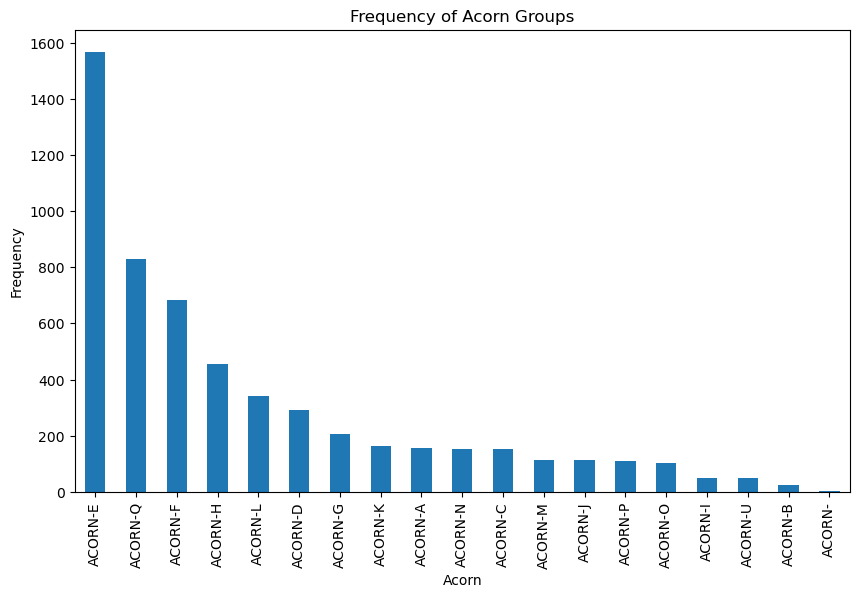

<Axes: title={'center': 'Frequency of Acorn Grouped Categories'}, xlabel='Acorn_grouped'>

Text(0.5, 0, 'Acorn_grouped')

Text(0, 0.5, 'Frequency')

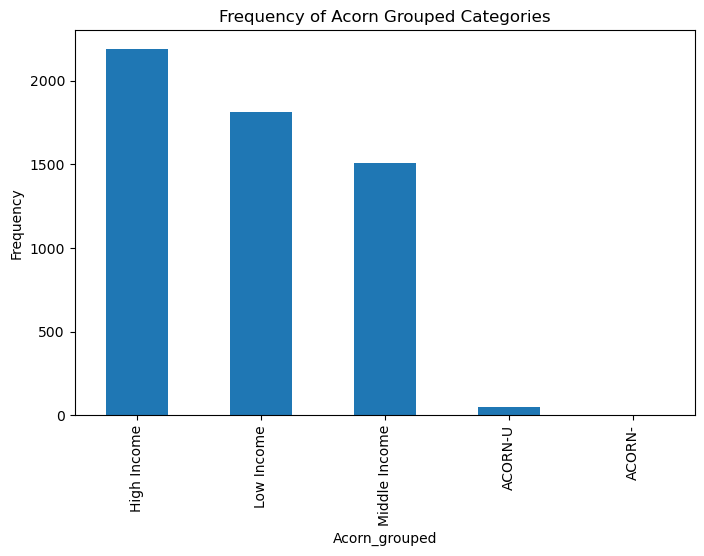

In [27]:
cleaned_household_info['Acorn'].value_counts().plot(kind='bar', figsize=(10, 6), title='Frequency of Acorn Groups')
plt.xlabel('Acorn')
plt.ylabel('Frequency')
plt.show()

cleaned_household_info['Acorn_grouped'].value_counts().plot(kind='bar', figsize=(8, 5), title='Frequency of Acorn Grouped Categories')
plt.xlabel('Acorn_grouped')
plt.ylabel('Frequency')
plt.show()

**Kotitaloudet on jaettu tarkasti Acorn-luokituksiin**, joissa ACORN-E, Q ja F hallitsevat.

<Axes: title={'center': 'Distribution of stdorToU'}, ylabel='count'>

Text(0, 0.5, '')

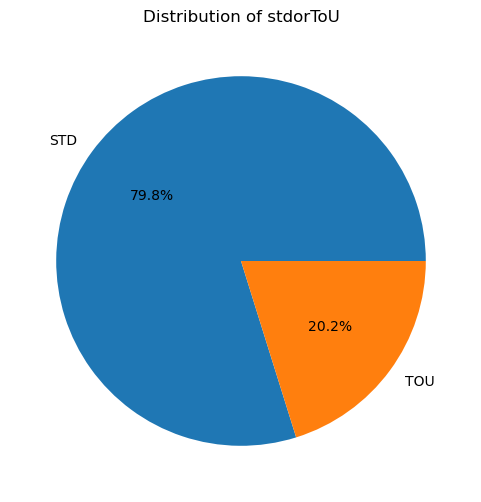

In [28]:
cleaned_household_info['stdorToU'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Distribution of stdorToU')
plt.ylabel('')
plt.show()

**Suurin osa kotitalouksista käyttää Vakio, mutta Aikaperusteinen hinnoittelu on yleisempi varakkaissa kotitalouksissa.**


Cross-tabulation of Acorn_grouped and stdorToU:
stdorToU        STD  TOU
Acorn_grouped           
ACORN-            0    2
ACORN-U          39   10
High Income    1702  490
Low Income     1518  298
Middle Income  1184  323


<Axes: title={'center': 'stdorToU Distribution Across Acorn_grouped Categories'}, xlabel='Acorn_grouped'>

Text(0.5, 0, 'Acorn_grouped')

Text(0, 0.5, 'Frequency')

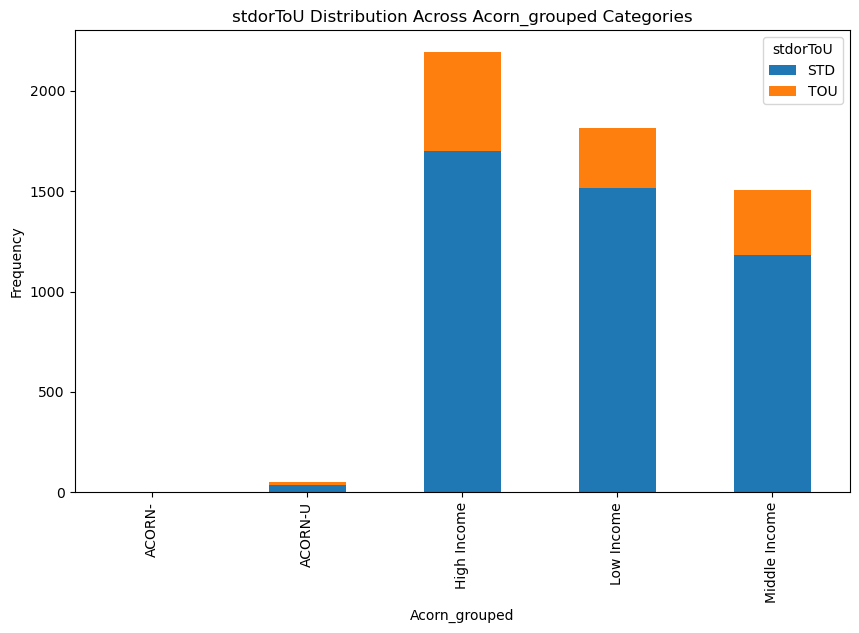

In [29]:
cross_tab = pd.crosstab(cleaned_household_info['Acorn_grouped'], cleaned_household_info['stdorToU'])
print("Cross-tabulation of Acorn_grouped and stdorToU:")
print(cross_tab)

cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), title='stdorToU Distribution Across Acorn_grouped Categories')
plt.xlabel('Acorn_grouped')
plt.ylabel('Frequency')
plt.show()


In [30]:
summary_statistics = cleaned_household_info.describe(include='all')
summary_statistics.to_csv('/Users/emre/Desktop/ai_da_jamk/currentai/docs/Phase 2/household_info_summary.csv')

with open('/Users/emre/Desktop/ai_da_jamk/currentai/docs/Phase 2/household_info_insights.txt', 'w') as f:
    for column in categorical_columns:
        f.write(f"Frequency distribution for {column}:\n")
        f.write(cleaned_household_info[column].value_counts().to_string())
        f.write("\n\n")


37

32

2

34

309

2

42

123

2

## **2.ACORN DETAILS**

In [32]:
cleaned_acorn_details_path = "/Users/emre/Desktop/ai_da_jamk/currentai/data/processed/cleaned_acorn_details.csv"
cleaned_acorn_details = pd.read_csv(cleaned_acorn_details_path)

print(cleaned_acorn_details.info())
print(cleaned_acorn_details.describe())
print(cleaned_acorn_details.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MainCategories  398 non-null    object 
 1   SubCategories   398 non-null    object 
 2   Reference       398 non-null    object 
 3   AcornA          398 non-null    float64
 4   AcornB          398 non-null    float64
 5   AcornC          398 non-null    float64
 6   AcornD          398 non-null    float64
 7   AcornE          398 non-null    float64
 8   AcornF          398 non-null    float64
 9   AcornG          398 non-null    float64
 10  AcornH          398 non-null    float64
 11  AcornI          398 non-null    float64
 12  AcornJ          398 non-null    float64
 13  AcornK          398 non-null    float64
 14  AcornL          398 non-null    float64
 15  AcornM          398 non-null    float64
 16  AcornN          398 non-null    float64
 17  AcornO          398 non-null    flo

In [33]:
print(cleaned_acorn_details.isnull().sum())
print(cleaned_acorn_details['MainCategories'].unique())
print(cleaned_acorn_details['SubCategories'].unique())

MainCategories    0
SubCategories     0
Reference         0
AcornA            0
AcornB            0
AcornC            0
AcornD            0
AcornE            0
AcornF            0
AcornG            0
AcornH            0
AcornI            0
AcornJ            0
AcornK            0
AcornL            0
AcornM            0
AcornN            0
AcornO            0
AcornP            0
AcornQ            0
dtype: int64
['Population' 'Family' 'Economy' 'Education' 'Health' 'Transport'
 'Marketing Channels' 'Finance' 'Digital' 'Shopping' 'Environment'
 'Community Safety' 'Leisure Time']
['Age' 'Geography' 'Ethnicity' 'Country Of Birth' 'Religion' 'Structure'
 'Children In Household' 'Household Size' 'Economic Activity'
 'Social Grade' 'Highest Level Of Qualifications (Adults)'
 'England: Pupils At The End Of Ks1' 'England: Pupils At The End Of Ks2'
 'England: Pupils At The End Of Ks4' 'Behaviours & Lifestyle'
 'Travel To Work' 'Channels Received' 'Future Responses'
 'Financial Attitudes' 'Financia

<Axes: title={'center': 'Frequency of Main Categories'}, xlabel='MainCategories'>

Text(0.5, 0, 'Main Categories')

Text(0, 0.5, 'Frequency')

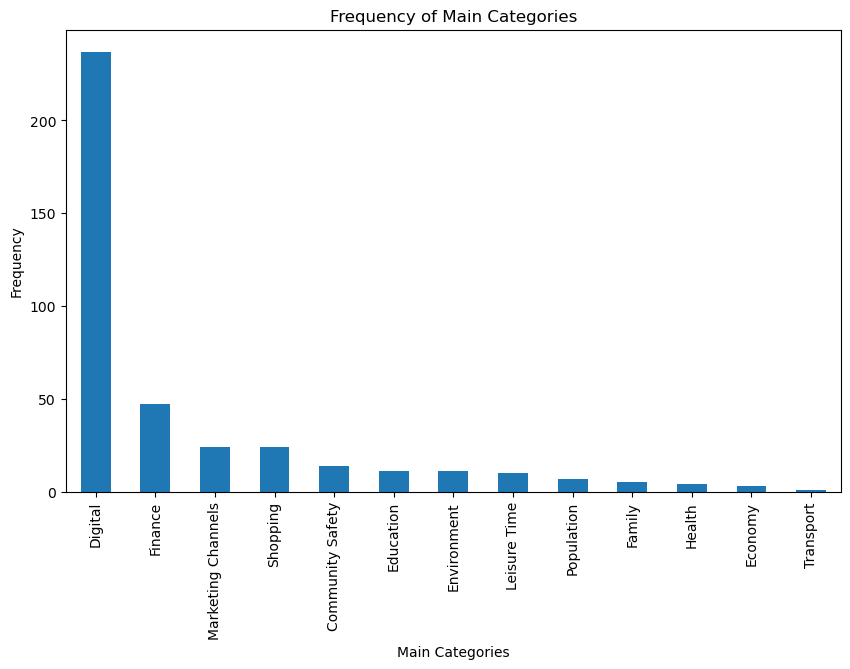

<Axes: title={'center': 'Frequency of Sub Categories'}, xlabel='SubCategories'>

Text(0.5, 0, 'Sub Categories')

Text(0, 0.5, 'Frequency')

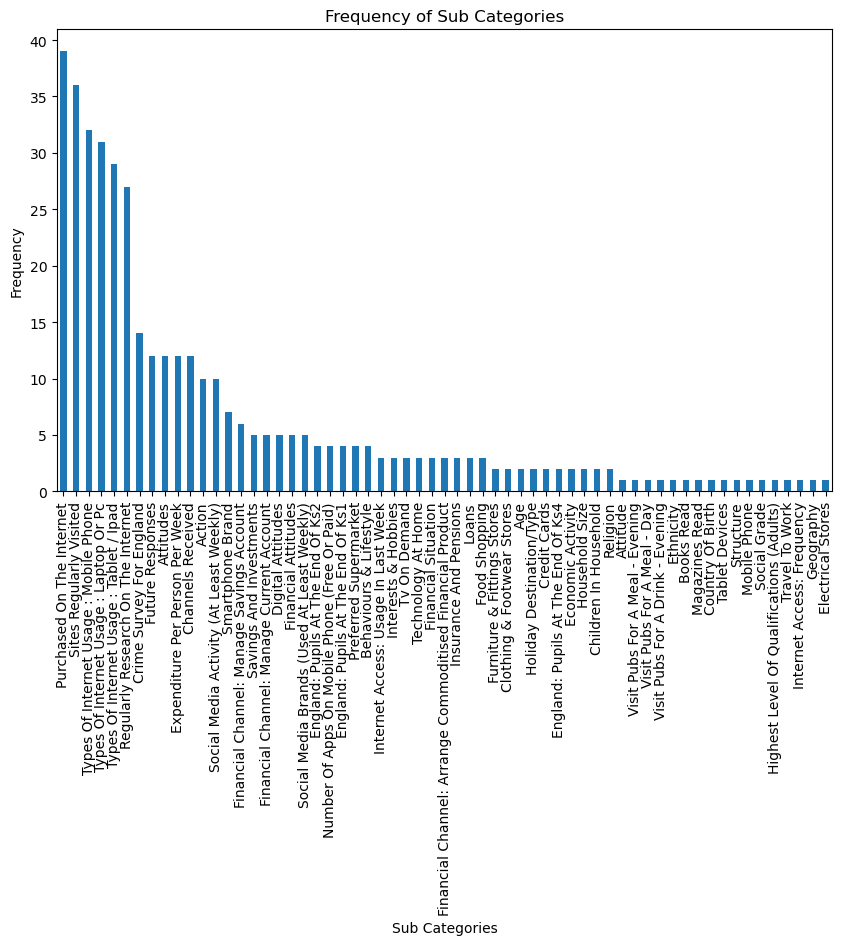

In [34]:
main_categories_dist = cleaned_acorn_details['MainCategories'].value_counts()
main_categories_dist.plot(kind='bar', figsize=(10, 6), title='Frequency of Main Categories')
plt.xlabel('Main Categories')
plt.ylabel('Frequency')
plt.show()

sub_categories_dist = cleaned_acorn_details['SubCategories'].value_counts()
sub_categories_dist.plot(kind='bar', figsize=(10, 6), title='Frequency of Sub Categories')
plt.xlabel('Sub Categories')
plt.ylabel('Frequency')
plt.show()

**Digitaalisuus on merkittävin painopiste:** Kaikista pääkategorioista digitaaliseen käyttäytymiseen liittyvät luokat korostuvat.

Summary statistics for numeric columns:
           AcornA      AcornB      AcornC      AcornD      AcornE      AcornF  \
count  398.000000  398.000000  398.000000  398.000000  398.000000  398.000000   
mean   108.228643  109.665829  103.527638  121.346734  118.520101   98.419598   
std     22.069286   13.466682   11.401665   28.815847   18.086786   12.126218   
min     27.000000   77.000000   76.000000   32.000000   68.000000   61.000000   
25%     97.000000  101.000000   96.000000  101.000000  104.000000   91.000000   
50%    105.500000  107.500000  103.000000  121.000000  118.500000  100.000000   
75%    121.000000  118.000000  112.000000  137.000000  131.000000  105.000000   
max    189.000000  153.000000  141.000000  214.000000  176.000000  131.000000   

           AcornG      AcornH      AcornI      AcornJ      AcornK      AcornL  \
count  398.000000  398.000000  398.000000  398.000000  398.000000  398.000000   
mean   103.484925  100.648241   88.467337  109.025126  114.243719   

<Figure size 1000x600 with 0 Axes>

<Axes: >

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 [Text(1, 0, 'AcornA'),
  Text(2, 0, 'AcornB'),
  Text(3, 0, 'AcornC'),
  Text(4, 0, 'AcornD'),
  Text(5, 0, 'AcornE'),
  Text(6, 0, 'AcornF'),
  Text(7, 0, 'AcornG'),
  Text(8, 0, 'AcornH'),
  Text(9, 0, 'AcornI'),
  Text(10, 0, 'AcornJ'),
  Text(11, 0, 'AcornK'),
  Text(12, 0, 'AcornL'),
  Text(13, 0, 'AcornM'),
  Text(14, 0, 'AcornN'),
  Text(15, 0, 'AcornO'),
  Text(16, 0, 'AcornP'),
  Text(17, 0, 'AcornQ')])

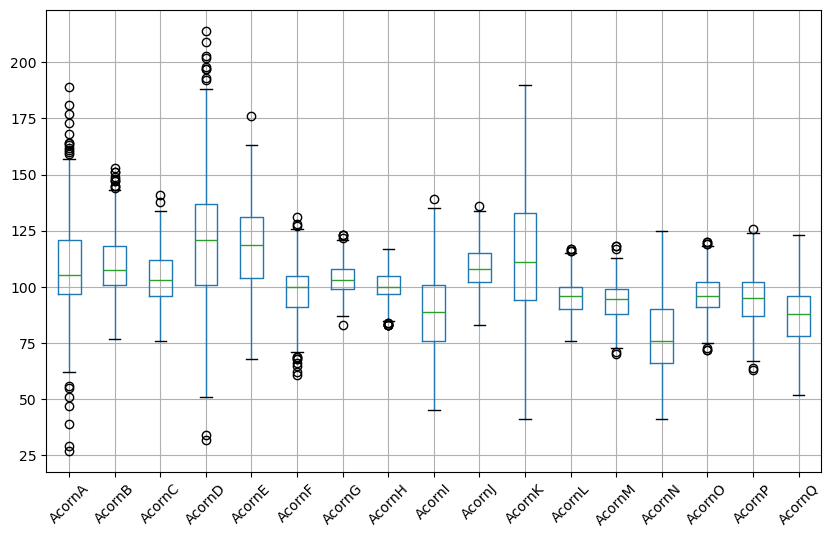

In [35]:
numeric_columns = [col for col in cleaned_acorn_details.columns if cleaned_acorn_details[col].dtype in ['int64', 'float64']]
print("Summary statistics for numeric columns:")
print(cleaned_acorn_details[numeric_columns].describe())

plt.figure(figsize=(10, 6))
cleaned_acorn_details[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.show()

**Sosioekonomiset erot näkyvät:** Eri Acorn-luokilla on selkeitä eroja keskiarvoissa ja hajonnoissa, erityisesti **AcornD**, **AcornE** ja **AcornK** korostuvat.

Mean values for numeric columns grouped by MainCategories:
                        AcornA      AcornB      AcornC      AcornD  \
MainCategories                                                       
Community Safety    104.571429  103.285714  102.642857   95.000000   
Digital             106.303797  108.797468  101.510549  128.603376   
Economy              89.000000  105.000000  105.000000  101.000000   
Education           114.545455  109.818182  107.909091  105.545455   
Environment         103.909091  104.363636  105.090909  100.272727   
Family              111.400000  111.000000  100.600000   95.400000   
Finance             119.085106  119.212766  108.723404  125.000000   
Health              123.750000  108.750000  105.000000  117.750000   
Leisure Time         96.600000  103.100000   99.000000  104.400000   
Marketing Channels  113.750000  112.166667  111.291667  118.166667   
Population          102.285714  105.571429  105.000000   95.857143   
Shopping            108.208333 

<Figure size 1000x600 with 0 Axes>

<Axes: ylabel='MainCategories'>

Text(0.5, 1.0, 'Mean Values for Numeric Columns Grouped by MainCategories')

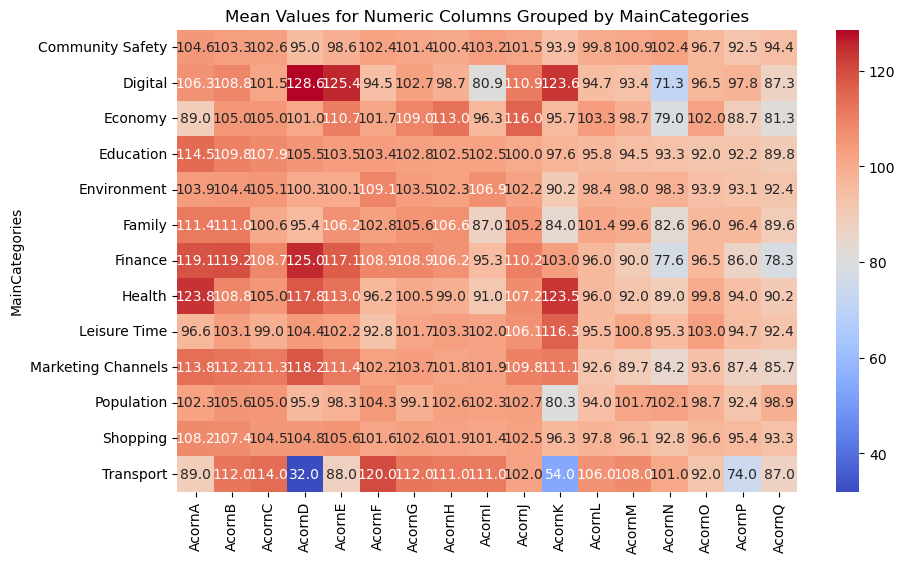

In [37]:
grouped_data = cleaned_acorn_details.groupby('MainCategories')[numeric_columns].mean()
print("Mean values for numeric columns grouped by MainCategories:")
print(grouped_data)

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_data, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Mean Values for Numeric Columns Grouped by MainCategories')
plt.show()

3. **Rahoitus ja ostokset:** Näillä kategorioilla on vahva yhteys moniin Acorn-luokkiin, mikä mahdollistaa tarkan analyysin kulutuskäyttäytymisestä.
4. **Ehdotuksia jatkoanalyysille:**
   - Tutki **pää- ja alakategorioiden yhteyksiä energiankulutukseen.**
   - Analysoi **poikkeavien arvojen** syitä erityisesti luokissa, joissa hajonta on suuri.
   - Yhdistä Acorn-tiedot kotitalouksien demografiatietoihin syvällisemmän analyysin saamiseksi.

In [38]:
q1 = cleaned_acorn_details['AcornA'].quantile(0.25)
q3 = cleaned_acorn_details['AcornA'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f"Outliers for AcornA: Below {lower_bound} or Above {upper_bound}")

cleaned_acorn_details = cleaned_acorn_details[
    (cleaned_acorn_details['AcornA'] >= lower_bound) & 
    (cleaned_acorn_details['AcornA'] <= upper_bound)
]
print("Shape after removing outliers:", cleaned_acorn_details.shape)

Outliers for AcornA: Below 61.0 or Above 157.0
Shape after removing outliers: (379, 20)


In [39]:
cleaned_acorn_details.to_csv('/Users/emre/Desktop/ai_da_jamk/currentai/docs/Phase 2/cleaned_acorn_details.csv', index=False)

## **3.BANK HOLIDAYS**

In [40]:
cleaned_uk_bank_holidays_path = "/Users/emre/Desktop/ai_da_jamk/currentai/data/processed/cleaned_uk_bank_holidays.csv"
cleaned_uk_bank_holidays = pd.read_csv(cleaned_uk_bank_holidays_path)

print(cleaned_uk_bank_holidays.info())
print(cleaned_uk_bank_holidays.describe())
print(cleaned_uk_bank_holidays.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Bank holidays  25 non-null     object
dtypes: object(1)
memory usage: 328.0+ bytes
None
       Bank holidays
count             25
unique            25
top       2012-02-01
freq               1
  Bank holidays
0    2012-02-01
1    2012-04-06
2    2012-05-06
3    2012-06-04
4    2012-07-05


Year distribution:
Year
2012    9
2013    8
2014    8
Name: count, dtype: int64


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Year'>

Text(0.5, 1.0, 'Distribution of Bank Holidays by Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Count')

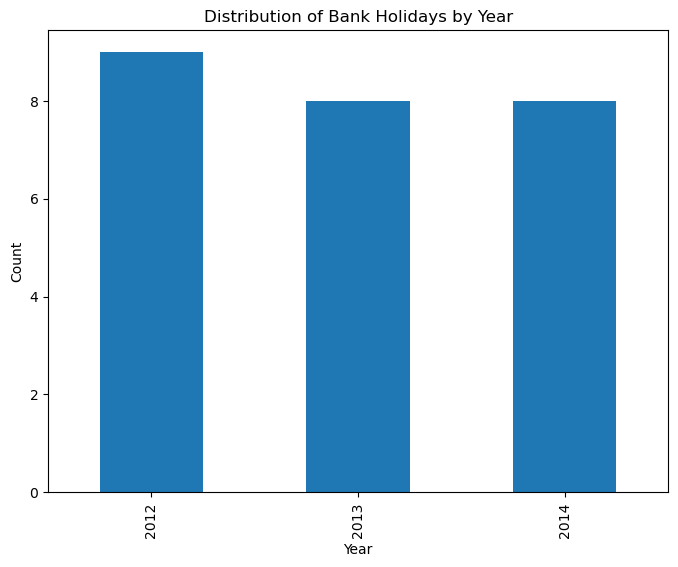

In [ ]:
cleaned_uk_bank_holidays['Bank holidays'] = pd.to_datetime(cleaned_uk_bank_holidays['Bank holidays'])

cleaned_uk_bank_holidays['Year'] = cleaned_uk_bank_holidays['Bank holidays'].dt.year
year_distribution = cleaned_uk_bank_holidays['Year'].value_counts().sort_index()
print("Year distribution:")
print(year_distribution)

plt.figure(figsize=(8, 6))
year_distribution.plot(kind='bar')
plt.title("Distribution of Bank Holidays by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

Weekday distribution:
Weekday
Monday       8
Wednesday    5
Friday       5
Thursday     3
Tuesday      3
Sunday       1
Name: count, dtype: int64


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Weekday'>

Text(0.5, 1.0, 'Distribution of Bank Holidays by Weekday')

Text(0.5, 0, 'Weekday')

Text(0, 0.5, 'Count')

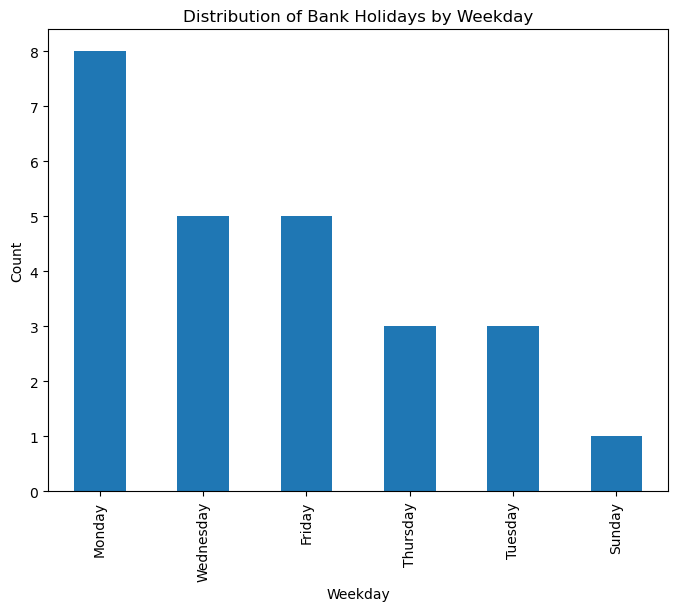

In [ ]:
cleaned_uk_bank_holidays['Weekday'] = cleaned_uk_bank_holidays['Bank holidays'].dt.day_name()
weekday_distribution = cleaned_uk_bank_holidays['Weekday'].value_counts()
print("Weekday distribution:")
print(weekday_distribution)

plt.figure(figsize=(8, 6))
weekday_distribution.plot(kind='bar')
plt.title("Distribution of Bank Holidays by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.show()

Month distribution:
Month
December     6
May          4
April        3
August       3
January      3
June         2
February     1
July         1
September    1
March        1
Name: count, dtype: int64


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Month'>

Text(0.5, 1.0, 'Distribution of Bank Holidays by Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Count')

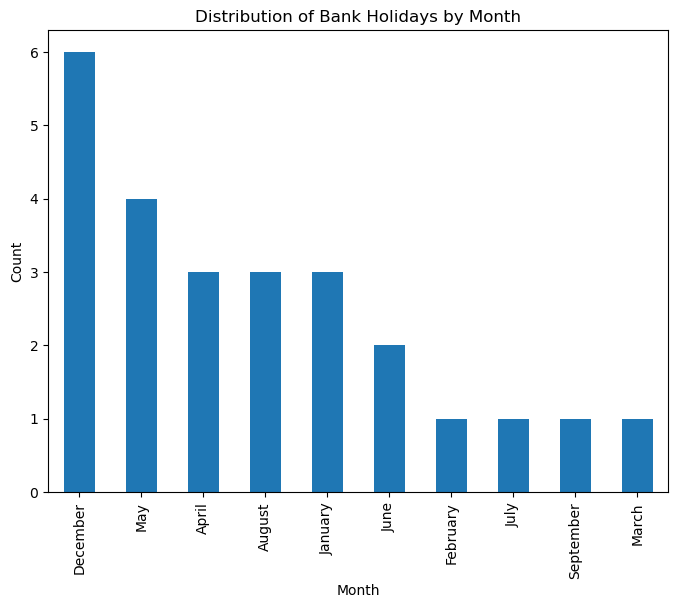

In [45]:
cleaned_uk_bank_holidays['Month'] = cleaned_uk_bank_holidays['Bank holidays'].dt.month_name()
month_distribution = cleaned_uk_bank_holidays['Month'].value_counts()
print("Month distribution:")
print(month_distribution)

plt.figure(figsize=(8, 6))
month_distribution.plot(kind='bar')
plt.title("Distribution of Bank Holidays by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


**Ajoitus:** Pankkivapaapäivät painottuvat maanantaihin ja joulukuuhun.
**Vuodenaikavaihtelu:** Kevään ja joulukauden ympärillä on enemmän vapaapäiviä kuin kesällä tai syksyllä.

## **4. WEATHER HOURLY**

In [46]:
cleaned_weather_hourly_path = "/Users/emre/Desktop/ai_da_jamk/currentai/data/processed/cleaned_weather_hourly.csv"
cleaned_weather_hourly = pd.read_csv(cleaned_weather_hourly_path)

print(cleaned_weather_hourly.info())
print(cleaned_weather_hourly.describe())
print(cleaned_weather_hourly.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21003 entries, 0 to 21002
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   visibility           21003 non-null  float64
 1   windBearing          21003 non-null  int64  
 2   temperature          21003 non-null  float64
 3   time                 21003 non-null  object 
 4   dewPoint             21003 non-null  float64
 5   pressure             21003 non-null  float64
 6   apparentTemperature  21003 non-null  float64
 7   windSpeed            21003 non-null  float64
 8   precipType           21003 non-null  object 
 9   icon                 21003 non-null  object 
 10  humidity             21003 non-null  float64
 11  summary              21003 non-null  object 
 12  windChillEffect      21003 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 2.1+ MB
None
         visibility   windBearing   temperature      dewPoint      pressur

Average temperature by hour:
Hour
0      9.166663
1      8.902302
2      8.684150
3      8.504739
4      8.365748
5      8.305079
6      8.432098
7      8.845970
8      9.471952
9     10.295499
10    11.112440
11    11.787003
12    12.229757
13    12.494721
14    12.582114
15    12.560570
16    12.332520
17    11.994309
18    11.470620
19    10.988527
20    10.559602
21    10.148309
22     9.797857
23     9.466375
Name: temperature, dtype: float64


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Hour'>

Text(0.5, 1.0, 'Average Hourly Temperature')

Text(0.5, 0, 'Hour')

Text(0, 0.5, 'Temperature')

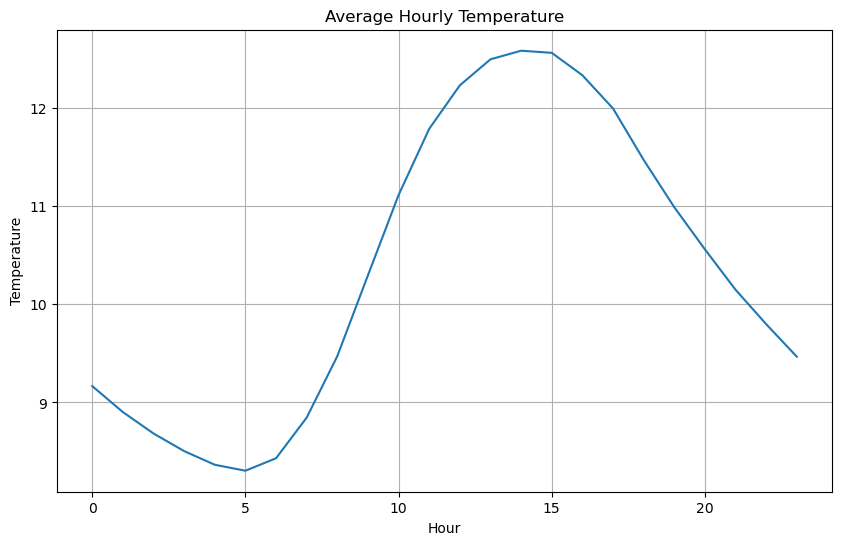

In [49]:
cleaned_weather_hourly['time'] = pd.to_datetime(cleaned_weather_hourly['time'])

cleaned_weather_hourly['Hour'] = cleaned_weather_hourly['time'].dt.hour
cleaned_weather_hourly['Date'] = cleaned_weather_hourly['time'].dt.date

hourly_pattern = cleaned_weather_hourly.groupby('Hour')['temperature'].mean()
print("Average temperature by hour:")
print(hourly_pattern)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
hourly_pattern.plot(kind='line')
plt.title("Average Hourly Temperature")
plt.xlabel("Hour")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

## **5. WEATHER DAILY**

In [47]:
cleaned_weather_daily_path = "/Users/emre/Desktop/ai_da_jamk/currentai/data/processed/cleaned_weather_daily.csv"
cleaned_weather_daily = pd.read_csv(cleaned_weather_daily_path)

print(cleaned_weather_daily.info())
print(cleaned_weather_daily.describe())
print(cleaned_weather_daily.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TempMax                      707 non-null    float64
 1   temperatureMaxTime           707 non-null    object 
 2   windBearing                  707 non-null    int64  
 3   icon                         707 non-null    object 
 4   dewPoint                     707 non-null    float64
 5   temperatureMinTime           707 non-null    object 
 6   CloudCover                   707 non-null    float64
 7   WindSpeed                    707 non-null    float64
 8   pressure                     707 non-null    float64
 9   apparentTemperatureMinTime   707 non-null    object 
 10  apparentTemperatureHigh      707 non-null    float64
 11  PrecipitationType            707 non-null    object 
 12  visibility                   707 non-null    float64
 13  Humidity            

<Figure size 1000x600 with 0 Axes>

(array([19., 32., 34., 35., 57., 74., 70., 59., 69., 59., 55., 49., 32.,
        20., 17., 14.,  6.,  3.,  0.,  3.]),
 array([ 0.  ,  0.79,  1.58,  2.37,  3.16,  3.95,  4.74,  5.53,  6.32,
         7.11,  7.9 ,  8.69,  9.48, 10.27, 11.06, 11.85, 12.64, 13.43,
        14.22, 15.01, 15.8 ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Daily Temperature Range Distribution')

Text(0.5, 0, 'Temperature Range')

Text(0, 0.5, 'Frequency')

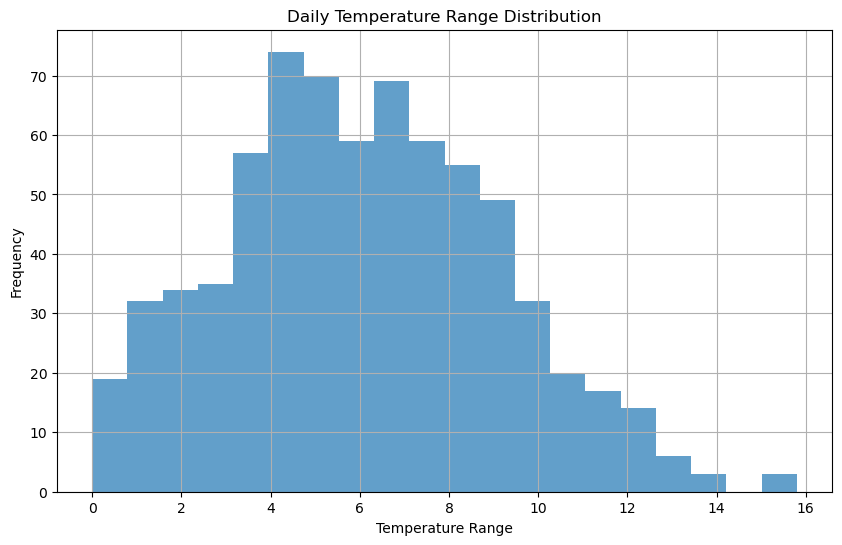

In [50]:
cleaned_weather_daily['Date'] = pd.to_datetime(cleaned_weather_daily['Date'])

cleaned_weather_daily['Temperature Range'] = (
    cleaned_weather_daily['TempHigh'] - cleaned_weather_daily['TempLow']
)

plt.figure(figsize=(10, 6))
plt.hist(cleaned_weather_daily['Temperature Range'], bins=20, alpha=0.7)
plt.title("Daily Temperature Range Distribution")
plt.xlabel("Temperature Range")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


**Lämpötilaerojen vaihtelu voi johtua sääilmiöistä, kuten kirkkaasta auringonpaisteesta päivällä ja viileistä öistä.**


In [51]:
common_columns = set(cleaned_weather_hourly.columns).intersection(
    cleaned_weather_daily.columns
)
print("Common columns between hourly and daily datasets:")
print(common_columns)


Common columns between hourly and daily datasets:
{'icon', 'Date', 'dewPoint', 'windBearing', 'summary', 'pressure', 'visibility'}


In [53]:
hourly_dates = cleaned_weather_hourly['Date'].unique()
daily_dates = cleaned_weather_daily['Date'].unique()

common_dates = set(hourly_dates).intersection(set(daily_dates))
print(f"Number of common dates: {len(common_dates)}")

missing_in_hourly = set(daily_dates) - set(hourly_dates)
missing_in_daily = set(hourly_dates) - set(daily_dates)
print(f"Dates missing in hourly data: {missing_in_hourly}")
print(f"Dates missing in daily data: {missing_in_daily}")

Number of common dates: 0
Dates missing in hourly data: {Timestamp('2013-09-26 23:00:00'), Timestamp('2011-12-14 00:00:00'), Timestamp('2014-03-29 00:00:00'), Timestamp('2014-01-18 00:00:00'), Timestamp('2012-04-29 23:00:00'), Timestamp('2012-07-08 23:00:00'), Timestamp('2013-10-07 23:00:00'), Timestamp('2012-12-17 00:00:00'), Timestamp('2011-12-27 00:00:00'), Timestamp('2012-12-20 00:00:00'), Timestamp('2013-10-08 23:00:00'), Timestamp('2012-11-21 00:00:00'), Timestamp('2012-02-08 00:00:00'), Timestamp('2012-07-02 23:00:00'), Timestamp('2013-07-12 23:00:00'), Timestamp('2012-06-18 23:00:00'), Timestamp('2011-11-09 00:00:00'), Timestamp('2013-05-12 23:00:00'), Timestamp('2013-08-21 23:00:00'), Timestamp('2014-02-14 00:00:00'), Timestamp('2012-08-25 23:00:00'), Timestamp('2012-07-10 23:00:00'), Timestamp('2012-09-07 23:00:00'), Timestamp('2011-12-11 00:00:00'), Timestamp('2012-10-09 23:00:00'), Timestamp('2012-10-27 23:00:00'), Timestamp('2011-11-30 00:00:00'), Timestamp('2013-08-03 23:

**Yhdistetään päivittäinen ja tunneittainen data päivämäärän perusteella**

In [ ]:
merged_data = pd.merge(cleaned_weather_daily, cleaned_weather_hourly, on='Date', suffixes=('_daily', '_hourly')) # yhdistetään päivittäinen ja tunneittainen data päivämäärän perusteella 

print("Merged dataset info:")
print(merged_data.info())
print(merged_data.head())

Merged dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   TempMax                      332 non-null    float64       
 1   temperatureMaxTime           332 non-null    object        
 2   windBearing_daily            332 non-null    int64         
 3   icon_daily                   332 non-null    object        
 4   dewPoint_daily               332 non-null    float64       
 5   temperatureMinTime           332 non-null    object        
 6   CloudCover                   332 non-null    float64       
 7   WindSpeed                    332 non-null    float64       
 8   pressure_daily               332 non-null    float64       
 9   apparentTemperatureMinTime   332 non-null    object        
 10  apparentTemperatureHigh      332 non-null    float64       
 11  PrecipitationType       

Correlation between redundant columns:
                 pressure_daily  pressure_hourly
pressure_daily         1.000000         0.938363
pressure_hourly        0.938363         1.000000


<Axes: >

Text(0.5, 1.0, 'Correlation Between Redundant Columns')

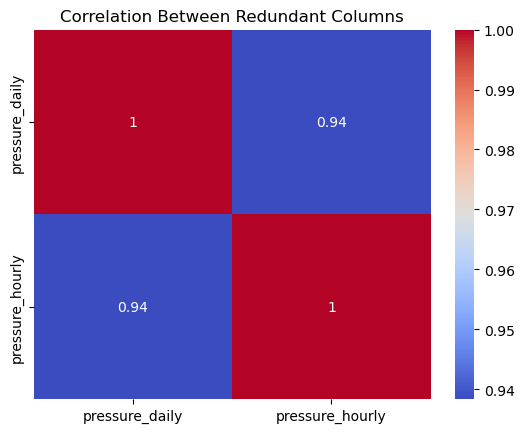

In [ ]:
redundant_columns = ['pressure_daily', 'pressure_hourly'] # poistetaan paineeseen liittyvät sarakkeet, koska ne ovat päällekkäisiä
correlation = merged_data[redundant_columns].corr() # lasketaan korrelaatio paineeseen liittyvien sarakkeiden välillä
print("Correlation between redundant columns:")
print(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Between Redundant Columns")
plt.show()

**Päivittäisen datan ja tuntikohtaisen datan välinen suhde on vahva, mutta aggregointi voi kadottaa joitakin poikkeamia.**


In [ ]:
hourly_aggregates = cleaned_weather_hourly.groupby('Date').agg({ # ryhmitellään tunneittainen data päivämäärän perusteella ja lasketaan keskiarvot, maksimit ja minimiarvot 
    'temperature': ['mean', 'max', 'min'],
    'visibility': 'mean',
    'humidity': 'mean',
    'windSpeed': 'mean',
    'pressure': 'mean'
}).reset_index()
hourly_aggregates.columns = ['Date', 'TempMean', 'TempMax', 'TempMin', # nimetään sarakkeet uudelleen 
                             'VisibilityMean', 'HumidityMean',
                             'WindSpeedMean', 'PressureMean']

print("Hourly aggregated data:")
print(hourly_aggregates.head())

Hourly aggregated data:
        Date  TempMean  TempMax  TempMin  VisibilityMean  HumidityMean  \
0 2011-11-01     13.49    13.49    13.49           13.63          0.88   
1 2011-11-02      9.43     9.43     9.43           11.62          0.93   
2 2011-11-03     14.83    14.83    14.83           13.21          0.90   
3 2011-11-04     13.65    13.65    13.65            6.18          0.96   
4 2011-11-05     11.22    11.22    11.22            3.99          0.96   

   WindSpeedMean  PressureMean  
0           3.11       1008.14  
1           2.08       1011.94  
2           4.24        996.06  
3           2.06        990.73  
4           1.55       1002.08  


In [ ]:
final_merged_data = pd.merge(cleaned_weather_daily, hourly_aggregates, on='Date', how='inner') # yhdistetään päivittäinen ja tunneittainen data päivämäärän perusteella 
print("Final merged dataset info:")
print(final_merged_data.info())
print(final_merged_data.head())

Final merged dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   TempMax_x                    332 non-null    float64       
 1   temperatureMaxTime           332 non-null    object        
 2   windBearing                  332 non-null    int64         
 3   icon                         332 non-null    object        
 4   dewPoint                     332 non-null    float64       
 5   temperatureMinTime           332 non-null    object        
 6   CloudCover                   332 non-null    float64       
 7   WindSpeed                    332 non-null    float64       
 8   pressure                     332 non-null    float64       
 9   apparentTemperatureMinTime   332 non-null    object        
 10  apparentTemperatureHigh      332 non-null    float64       
 11  PrecipitationType 

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Daily TempHigh')

Text(0, 0.5, 'Aggregated Hourly TempMax')

Text(0.5, 1.0, 'Comparison of Daily and Aggregated Hourly Temperatures')

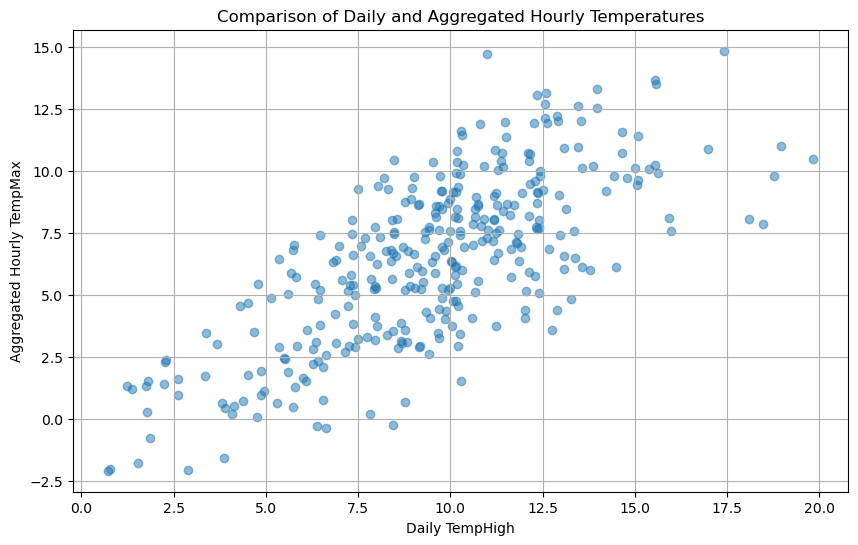

In [64]:
plt.figure(figsize=(10, 6))

plt.scatter(final_merged_data['TempHigh'], final_merged_data['TempMax_y'], alpha=0.5)

plt.xlabel("Daily TempHigh")
plt.ylabel("Aggregated Hourly TempMax")
plt.title("Comparison of Daily and Aggregated Hourly Temperatures")
plt.grid(True)
plt.show()

In [ ]:
final_merged_data.rename(columns={ # muutetaan sarakkeiden nimiä
    'TempMax_x': 'DailyTempMax',
    'TempMax_y': 'HourlyTempMax'
}, inplace=True)


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Daily TempMax')

Text(0, 0.5, 'Aggregated Hourly TempMax')

Text(0.5, 1.0, 'Comparison of Daily and Aggregated Hourly Temperatures')

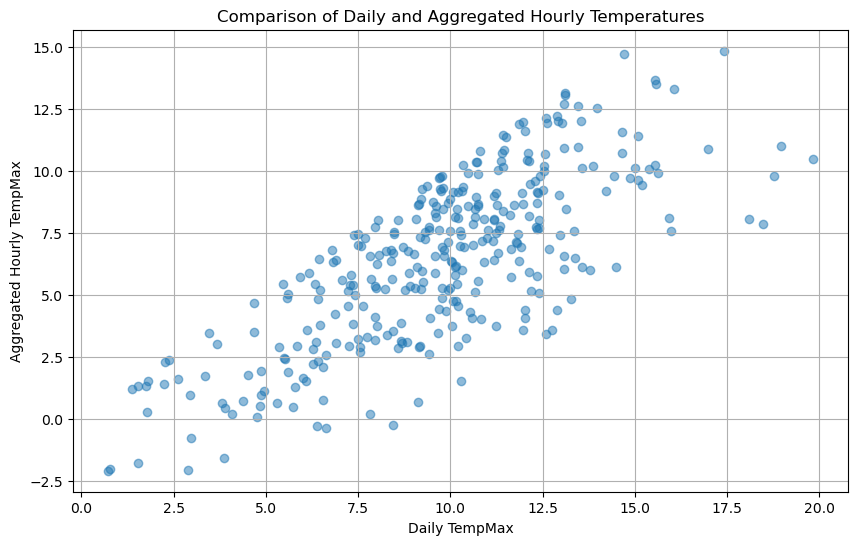

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(final_merged_data['DailyTempMax'], final_merged_data['HourlyTempMax'], alpha=0.5)
plt.xlabel("Daily TempMax")
plt.ylabel("Aggregated Hourly TempMax")
plt.title("Comparison of Daily and Aggregated Hourly Temperatures")
plt.grid(True)
plt.show()

## **6. DAILY DATA**

In [67]:
cleaned_daily_data_path = "/Users/emre/Desktop/ai_da_jamk/currentai/data/processed/cleaned_daily_data.csv"
cleaned_daily_data = pd.read_csv(cleaned_daily_data_path)

print(cleaned_daily_data.info())
print(cleaned_daily_data.describe())
print(cleaned_daily_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   LCLid          object 
 1   day            object 
 2   energy_median  float64
 3   energy_mean    float64
 4   energy_max     float64
 5   energy_count   int64  
 6   energy_std     float64
 7   energy_sum     float64
 8   energy_min     float64
 9   energy_range   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 267.8+ MB
None
       energy_median   energy_mean    energy_max  energy_count    energy_std  \
count   3.510433e+06  3.510433e+06  3.510433e+06  3.510433e+06  3.510433e+06   
mean    1.587391e-01  2.117301e-01  8.345197e-01  4.780364e+01  1.725386e-01   
std     1.701858e-01  1.908452e-01  6.683129e-01  2.810982e+00  1.528902e-01   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     6.700000e-02  9.808333e-02  3.460000e-01  4.800000e+01  6.928909e-02   
50

In [74]:
unique_values = cleaned_daily_data.nunique()
print(unique_values)

LCLid               5566
day                  829
energy_median      10415
energy_mean       359434
energy_max          6425
energy_count          44
energy_std       3127317
energy_sum        435857
energy_min          2149
energy_range       32987
dtype: int64


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Distribution of energy_median')

Text(0.5, 0, 'energy_median')

Text(0, 0.5, 'Frequency')

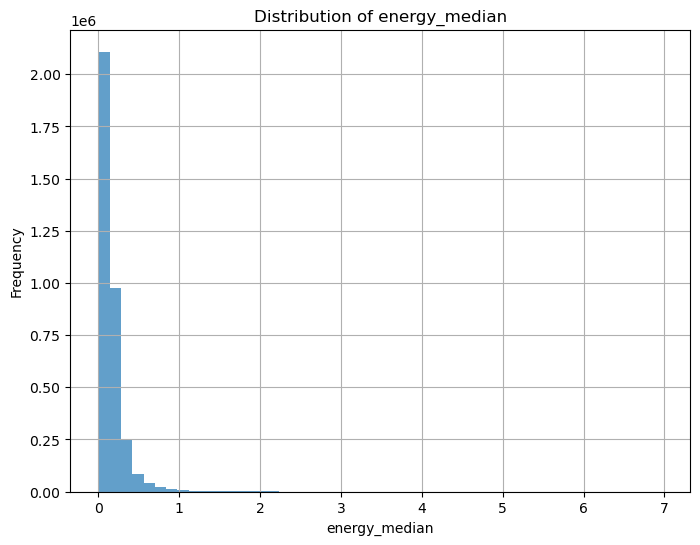

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Distribution of energy_mean')

Text(0.5, 0, 'energy_mean')

Text(0, 0.5, 'Frequency')

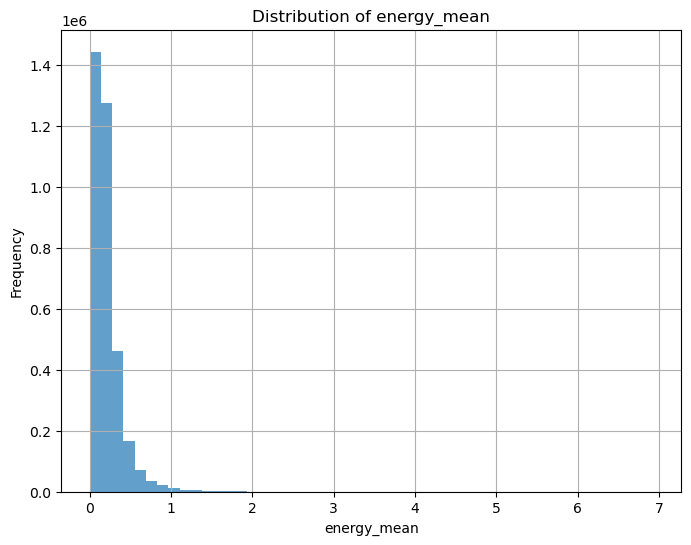

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Distribution of energy_max')

Text(0.5, 0, 'energy_max')

Text(0, 0.5, 'Frequency')

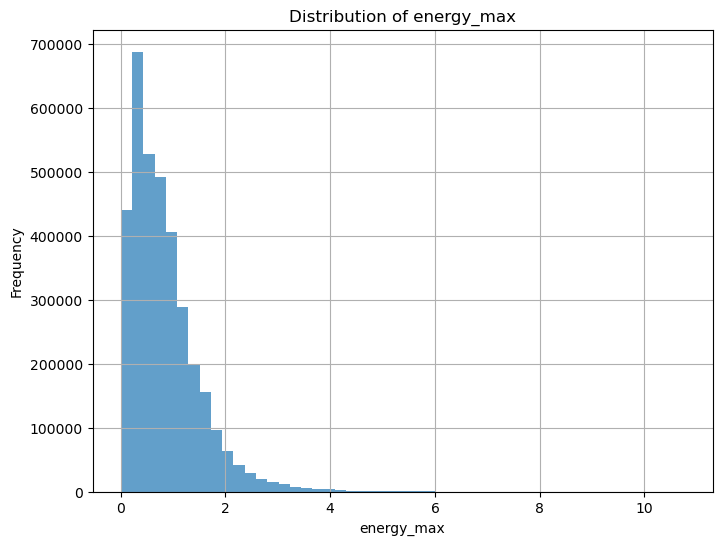

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Distribution of energy_sum')

Text(0.5, 0, 'energy_sum')

Text(0, 0.5, 'Frequency')

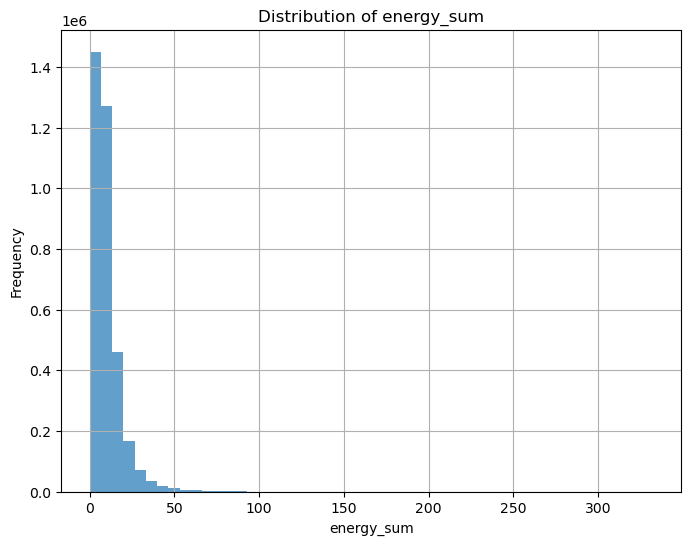

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Distribution of energy_range')

Text(0.5, 0, 'energy_range')

Text(0, 0.5, 'Frequency')

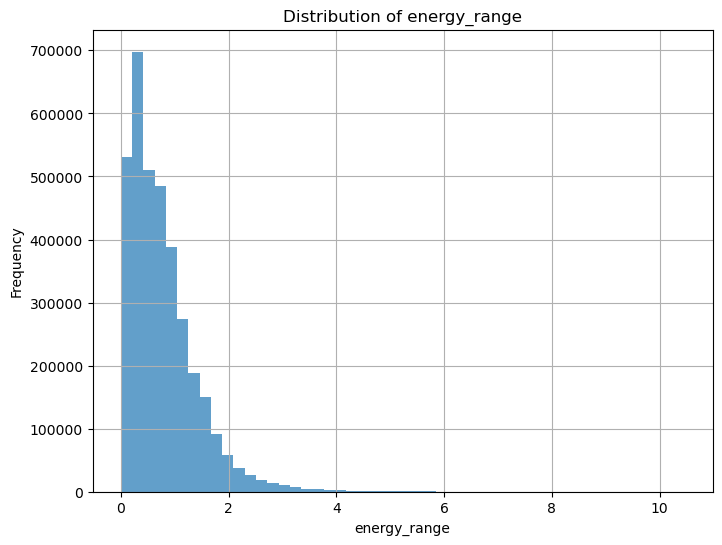

In [69]:
columns_to_plot = ['energy_median', 'energy_mean', 'energy_max', 'energy_sum', 'energy_range']
for col in columns_to_plot:
    plt.figure(figsize=(8, 6))
    cleaned_daily_data[col].hist(bins=50, alpha=0.7)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

**Jakaumat** 
- Kaikki energiaan liittyvät mittarit näyttävät oikealle vinoutuneita jakaumia. Tämä tarkoittaa, että useimmat kotitaloudet kuluttavat vähän energiaa, mutta joillakin on huomattavan suuria kulutusarvoja.


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

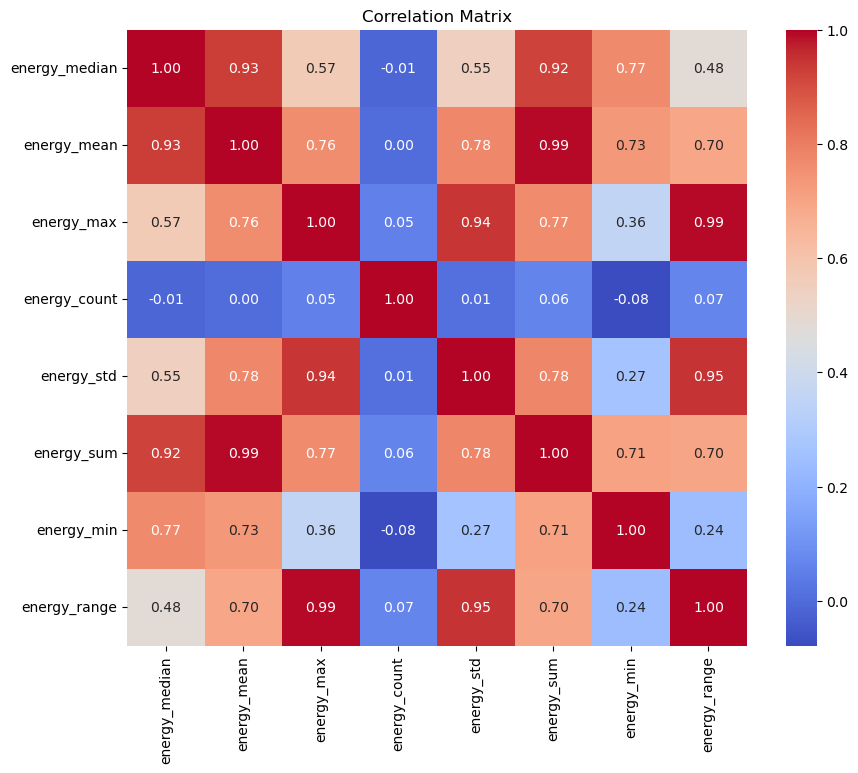

In [71]:
numeric_cols = cleaned_daily_data.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()



**Korrelaatio**:
- `energy_sum` ja `energy_mean` ovat lähes täydellisesti korreloituneet (0.99), mikä tarkoittaa, että nämä mittarit viestivät suurelta osin samaa tietoa.
- Vahvoja korrelaatioita löytyy myös esimerkiksi `energy_max` ja `energy_std` (0.94) sekä `energy_max` ja `energy_range` (0.99) välillä, mikä viittaa vaihtelun ja huippuarvojen väliseen suhteeseen.

Total energy consumption by year:
Year
2011    1.038744e+05
2012    1.248885e+07
2013    1.961579e+07
2014    3.331543e+06
Name: energy_sum, dtype: float64


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Year'>

Text(0.5, 1.0, 'Total Energy Consumption by Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Total Energy (kWh)')

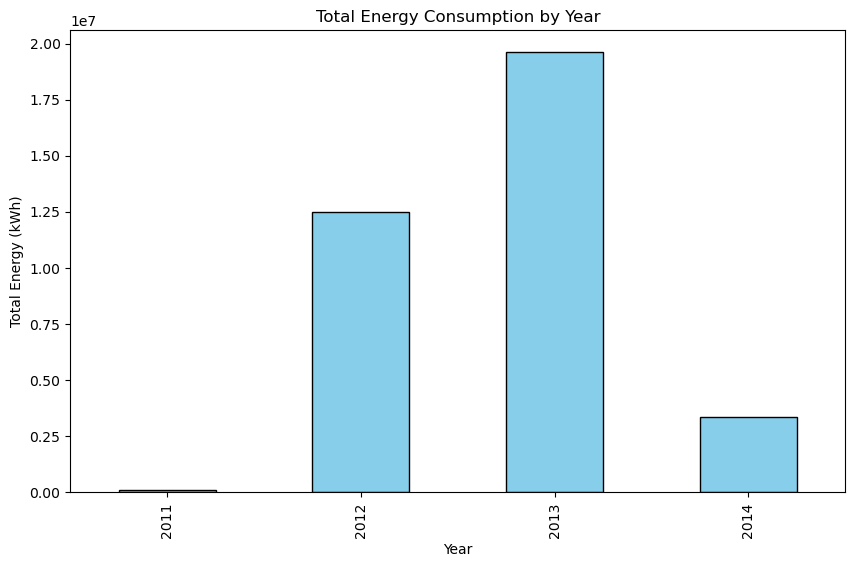

In [75]:
cleaned_daily_data['day'] = pd.to_datetime(cleaned_daily_data['day'])

cleaned_daily_data['Year'] = cleaned_daily_data['day'].dt.year
yearly_energy = cleaned_daily_data.groupby('Year')['energy_sum'].sum()
print("Total energy consumption by year:")
print(yearly_energy)

plt.figure(figsize=(10, 6))
yearly_energy.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Total Energy Consumption by Year")
plt.xlabel("Year")
plt.ylabel("Total Energy (kWh)")
plt.show()


- **Trendejä** 
- Energiankulutus kasvaa merkittävästi vuonna 2013 verrattuna muihin vuosiin. Tämä voi heijastaa laajempia trendejä, kuten lisääntynyttä datankeräystä tai ulkoisia tekijöitä, kuten sääolosuhteita.
- Jyrkkä lasku vuonna 2014 voi viitata puutteellisiin tietoihin kyseiseltä vuodelta tai vähentyneeseen osallistumiseen.

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Distribution of Energy Range')

Text(0.5, 0, 'Energy Range')

Text(0, 0.5, 'Frequency')

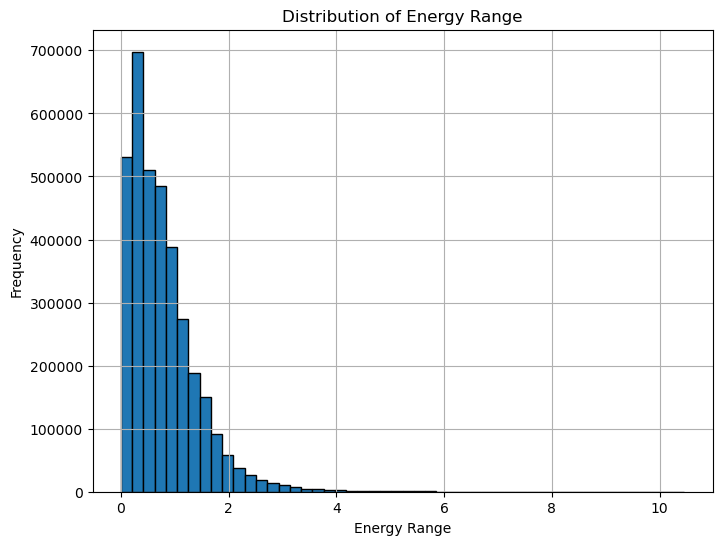

Top 5 days with highest energy range:
               day      LCLid  energy_range  energy_max  energy_min
3347093 2013-12-05  MAC001862        10.457      10.457       0.000
3347092 2013-12-04  MAC001862        10.400      10.761       0.361
3347094 2013-12-06  MAC001862        10.011      10.369       0.358
2877018 2012-12-17  MAC004488         9.212       9.257       0.045
1013036 2012-12-08  MAC002155         9.044       9.679       0.635


In [ ]:
plt.figure(figsize=(8, 6))
cleaned_daily_data['energy_range'].hist(bins=50, edgecolor='black')
plt.title("Distribution of Energy Range")
plt.xlabel("Energy Range")
plt.ylabel("Frequency")
plt.show()

top_energy_range = cleaned_daily_data.nlargest(5, 'energy_range')
print("Top 5 days with highest energy range:")
print(top_energy_range[['day', 'LCLid', 'energy_range', 'energy_max', 'energy_min']])

Daily average energy consumption (sample):
day
2011-11-23     6.952692
2011-11-24     8.536480
2011-11-25     9.499781
2011-11-26    10.267707
2011-11-27    10.850805
Name: energy_sum, dtype: float64


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='day'>

Text(0.5, 1.0, 'Daily Average Energy Consumption Over Time')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Average Energy Consumption (kWh)')

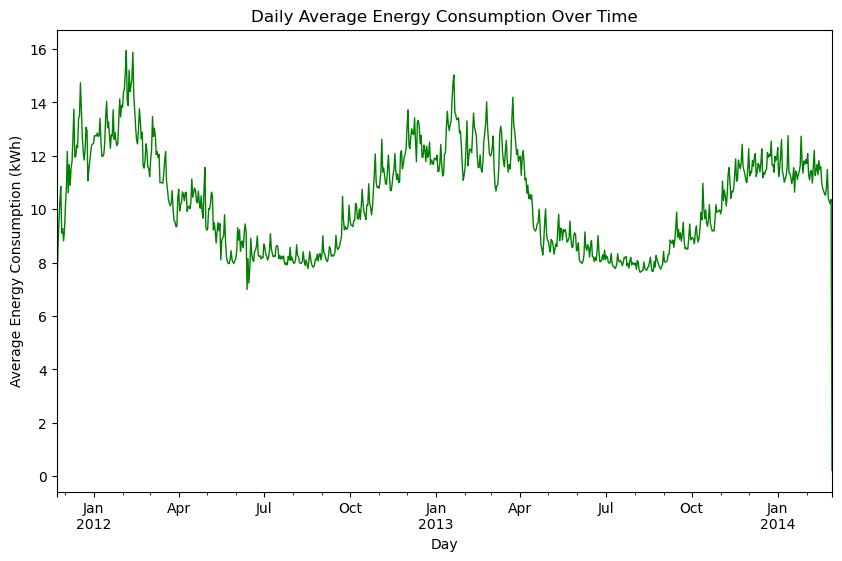

In [77]:
daily_average = cleaned_daily_data.groupby('day')['energy_sum'].mean()
print("Daily average energy consumption (sample):")
print(daily_average.head())

plt.figure(figsize=(10, 6))
daily_average.plot(color='green', linewidth=1)
plt.title("Daily Average Energy Consumption Over Time")
plt.xlabel("Day")
plt.ylabel("Average Energy Consumption (kWh)")
plt.show()

**Kausittaiset trendit**:
- Energiankulutus on korkeimmillaan talvella (esim. tammikuussa) ja alhaisimmillaan kesällä (esim. heinäkuussa). Tämä vastaa lämmitystarpeita kylmempinä kuukausina.
- Näkyvissä on ajoittaisia piikkejä, jotka liittyvät todennäköisesti tiettyihin päiviin, kuten lomiin tai ankarien sääolosuhteiden päiviin.


In [ ]:
cleaned_daily_data['day'] = pd.to_datetime(daily_data['day'])
weather_daily['day'] = pd.to_datetime(weather_daily['day'])

merged_data = pd.merge(daily_data, weather_daily, on='day', how='left')
print(merged_data.info())

In [ ]:
for col in ['temperatureMax', 'humidity', 'windSpeed']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=merged_data, x=col, y='energy_mean', alpha=0.5)
    plt.title(f"Energy Mean vs {col}")
    plt.xlabel(col)
    plt.ylabel("Energy Mean")
    plt.show()


In [ ]:
merged_data = pd.merge(merged_data, acorn, on='LCLid', how='left')
print(merged_data.info())


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='Acorn_grouped', y='energy_mean')
plt.title("Energy Mean by Acorn Group")
plt.xlabel("Acorn Group")
plt.ylabel("Energy Mean")
plt.show()


In [ ]:
uk_bank_holidays['day'] = pd.to_datetime(uk_bank_holidays['Bank holidays'])
merged_data['is_holiday'] = merged_data['day'].isin(uk_bank_holidays['day'])
holiday_grouped = merged_data.groupby('is_holiday')['energy_mean'].mean()
print("Average Energy Mean on Holidays vs Non-Holidays:")
print(holiday_grouped)


In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_data, x='is_holiday', y='energy_mean')
plt.title("Energy Mean on Holidays vs Non-Holidays")
plt.xlabel("Is Holiday")
plt.ylabel("Energy Mean")
plt.show()


In [ ]:
merged_data = pd.merge(merged_data, acorn_details, left_on='Acorn_grouped', right_on='MainCategories', how='left')

# Grouped Analysis
grouped_means = merged_data.groupby('MainCategories')['energy_mean'].mean()
print("Energy Mean by Main Categories:")
print(grouped_means)

# Visualize the relationship
plt.figure(figsize=(12, 6))
sns.barplot(x=grouped_means.index, y=grouped_means.values)
plt.title("Energy Mean by Main Categories")
plt.xlabel("Main Categories")
plt.ylabel("Energy Mean")
plt.xticks(rotation=45)
plt.show()


In [ ]:
weather_hourly['day'] = pd.to_datetime(weather_hourly['tstp']).dt.date
daily_weather_hourly = weather_hourly.groupby('day').agg({
    'temperature': 'mean',
    'windSpeed': 'max',
    'humidity': 'mean'
}).reset_index()

# Merge with the main dataset
merged_data = pd.merge(merged_data, daily_weather_hourly, left_on='day', right_on='day', how='left')
print(merged_data.info())


In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Merged Data)")
plt.show()


In [80]:
cleaned_halfhourly_data_path = "/Users/emre/Desktop/ai_da_jamk/currentai/data/processed/cleaned_halfhourly_data.csv"
cleaned_halfhourly_data = pd.read_csv(cleaned_halfhourly_data_path)

print(cleaned_halfhourly_data.info())
print(cleaned_halfhourly_data.describe())
print(cleaned_halfhourly_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167817021 entries, 0 to 167817020
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   LCLid           object 
 1   tstp            object 
 2   energy(kWh/hh)  float64
dtypes: float64(1), object(2)
memory usage: 3.8+ GB
None
       energy(kWh/hh)
count    1.678170e+08
mean     2.117811e-01
std      2.972411e-01
min      0.000000e+00
25%      5.800000e-02
50%      1.170000e-01
75%      2.390000e-01
max      1.076100e+01
       LCLid                 tstp  energy(kWh/hh)
0  MAC000027  2011-12-07 11:30:00           0.185
1  MAC000027  2011-12-07 12:00:00           0.155
2  MAC000027  2011-12-07 12:30:00           0.147
3  MAC000027  2011-12-07 13:00:00           0.164
4  MAC000027  2011-12-07 13:30:00           0.187


In [81]:
for column in cleaned_halfhourly_data.columns:
    unique_values = cleaned_halfhourly_data[column].nunique()
    print(f"{column}: {unique_values} unique values")

LCLid: 5566 unique values
tstp: 40405 unique values
energy(kWh/hh): 7526 unique values


<Figure size 800x600 with 0 Axes>

(array([7.8633237e+07, 4.1941101e+07, 1.8376143e+07, 9.2955230e+06,
        5.3056380e+06, 3.4754010e+06, 2.5291470e+06, 1.8546040e+06,
        1.3903830e+06, 1.0714210e+06, 8.2533300e+05, 6.2901900e+05,
        4.8638000e+05, 3.8158600e+05, 3.1971200e+05, 2.5530700e+05,
        2.0002100e+05, 1.5060500e+05, 1.2226800e+05, 9.8607000e+04,
        7.7740000e+04, 6.3112000e+04, 5.5821000e+04, 4.4371000e+04,
        3.6115000e+04, 3.0712000e+04, 2.4388000e+04, 1.9793000e+04,
        1.7361000e+04, 1.4959000e+04, 1.1558000e+04, 9.9410000e+03,
        9.0020000e+03, 7.4120000e+03, 6.3030000e+03, 5.4460000e+03,
        5.0420000e+03, 4.4750000e+03, 3.9590000e+03, 2.8840000e+03,
        2.3780000e+03, 2.5020000e+03, 2.6380000e+03, 2.5380000e+03,
        2.3300000e+03, 1.7040000e+03, 1.3090000e+03, 1.0570000e+03,
        1.1000000e+03, 8.4000000e+02, 6.5700000e+02, 6.2300000e+02,
        6.3000000e+02, 6.6800000e+02, 6.7600000e+02, 5.1900000e+02,
        3.4200000e+02, 2.3000000e+02, 2.3500000e

Text(0.5, 1.0, 'Distribution of Half-Hourly Energy Consumption')

Text(0.5, 0, 'Energy (kWh/hh)')

Text(0, 0.5, 'Frequency')

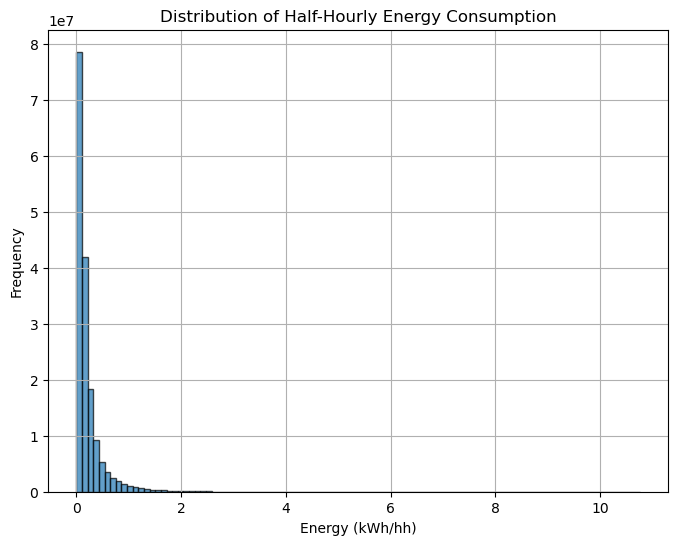

In [82]:
plt.figure(figsize=(8, 6))
plt.hist(cleaned_halfhourly_data['energy(kWh/hh)'], bins=100, edgecolor='k', alpha=0.7)
plt.title('Distribution of Half-Hourly Energy Consumption')
plt.xlabel('Energy (kWh/hh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [85]:
cleaned_halfhourly_data['date'] = pd.to_datetime(cleaned_halfhourly_data['tstp']).dt.date
cleaned_daily_data = cleaned_halfhourly_data.groupby(['LCLid', 'date'])['energy(kWh/hh)'].sum().reset_index()
cleaned_daily_data.rename(columns={'energy(kWh/hh)': 'daily_energy'}, inplace=True)

print(cleaned_daily_data.head())


       LCLid        date  daily_energy
0  MAC000002  2012-10-12         7.098
1  MAC000002  2012-10-13        11.087
2  MAC000002  2012-10-14        13.223
3  MAC000002  2012-10-15        10.257
4  MAC000002  2012-10-16         9.769


In [88]:
cleaned_household_info = cleaned_daily_data[cleaned_daily_data['LCLid'] == 'MAC000027']

print(cleaned_household_info.shape)
print(cleaned_household_info.head())


(815, 3)
           LCLid        date  daily_energy
16928  MAC000027  2011-12-07         3.997
16929  MAC000027  2011-12-08         9.287
16930  MAC000027  2011-12-09         7.525
16931  MAC000027  2011-12-10        12.684
16932  MAC000027  2011-12-11        13.845


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Daily Energy Consumption for Household MAC000027')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Daily Energy Consumption (kWh)')

(array([15340., 15431., 15522., 15614., 15706., 15796., 15887., 15979.,
        16071., 16161.]),
 [Text(15340.0, 0, '2012-01'),
  Text(15431.0, 0, '2012-04'),
  Text(15522.0, 0, '2012-07'),
  Text(15614.0, 0, '2012-10'),
  Text(15706.0, 0, '2013-01'),
  Text(15796.0, 0, '2013-04'),
  Text(15887.0, 0, '2013-07'),
  Text(15979.0, 0, '2013-10'),
  Text(16071.0, 0, '2014-01'),
  Text(16161.0, 0, '2014-04')])

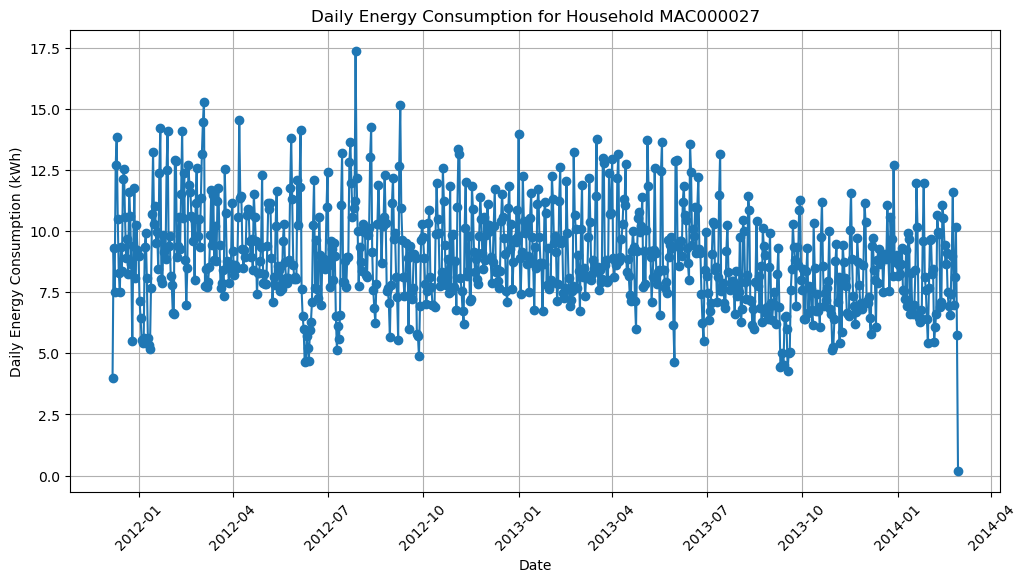

In [91]:
cleaned_household_info['date'] = pd.to_datetime(cleaned_household_info['date'])

plt.figure(figsize=(12, 6))
plt.plot(cleaned_household_info['date'], cleaned_household_info['daily_energy'], marker='o', linestyle='-')
plt.title('Daily Energy Consumption for Household MAC000027')
plt.xlabel('Date')
plt.ylabel('Daily Energy Consumption (kWh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
cleaned_halfhourly_data['hour'] = pd.to_datetime(cleaned_halfhourly_data['tstp']).dt.hour
hourly_energy = cleaned_halfhourly_data.groupby('hour')['energy(kWh/hh)'].mean().reset_index()

# Plot hourly average energy consumption
plt.figure(figsize=(10, 6))
plt.bar(hourly_energy['hour'], hourly_energy['energy(kWh/hh)'], color='skyblue', edgecolor='k')
plt.title('Average Energy Consumption by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy (kWh/hh)')
plt.grid(axis='y')
plt.show()


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 24 artists>

Text(0.5, 1.0, 'Average Energy Consumption by Hour')

Text(0.5, 0, 'Hour of the Day')

Text(0, 0.5, 'Average Energy (kWh/hh)')

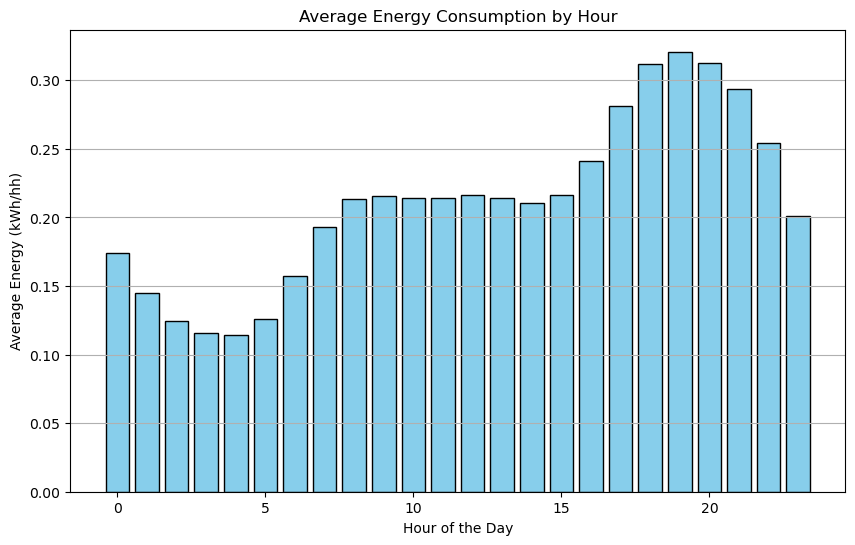

In [92]:
cleaned_halfhourly_data['hour'] = pd.to_datetime(cleaned_halfhourly_data['tstp']).dt.hour
hourly_energy = cleaned_halfhourly_data.groupby('hour')['energy(kWh/hh)'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(hourly_energy['hour'], hourly_energy['energy(kWh/hh)'], color='skyblue', edgecolor='k')
plt.title('Average Energy Consumption by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy (kWh/hh)')
plt.grid(axis='y')
plt.show()

In [93]:
correlation = cleaned_halfhourly_data[['hour', 'energy(kWh/hh)']].corr()
print(correlation)

                    hour  energy(kWh/hh)
hour            1.000000        0.169925
energy(kWh/hh)  0.169925        1.000000


In [94]:
Q1 = cleaned_halfhourly_data['energy(kWh/hh)'].quantile(0.25)
Q3 = cleaned_halfhourly_data['energy(kWh/hh)'].quantile(0.75)
IQR = Q3 - Q1

outliers = cleaned_halfhourly_data[
    (cleaned_halfhourly_data['energy(kWh/hh)'] < Q1 - 1.5 * IQR) |
    (cleaned_halfhourly_data['energy(kWh/hh)'] > Q3 + 1.5 * IQR)
]

print(f"Number of outliers: {len(outliers)}")

Number of outliers: 15416021


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Top 10 Households by Total Energy Consumption')

Text(0.5, 0, 'Total Energy Consumption (kWh)')

Text(0, 0.5, 'Household ID')

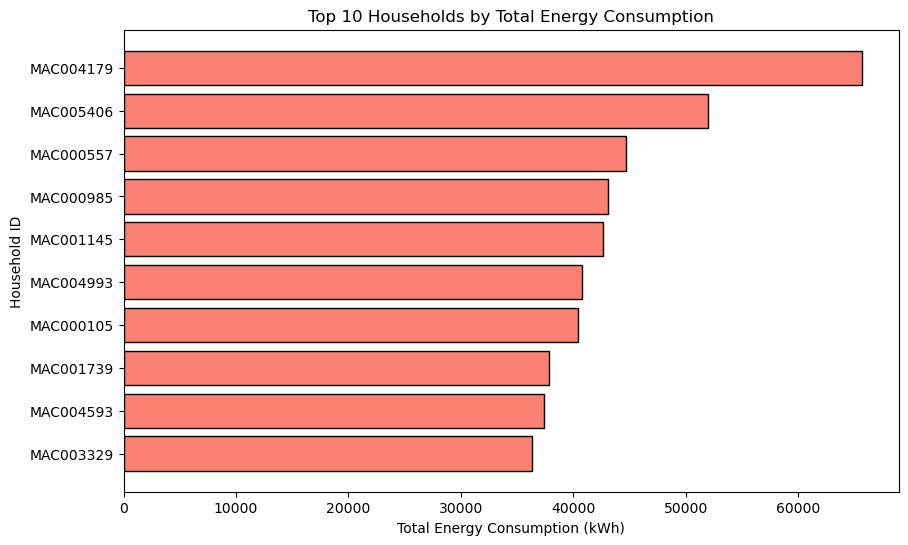

In [95]:
top_households = cleaned_halfhourly_data.groupby('LCLid')['energy(kWh/hh)'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
plt.barh(top_households['LCLid'], top_households['energy(kWh/hh)'], color='salmon', edgecolor='k')
plt.title('Top 10 Households by Total Energy Consumption')
plt.xlabel('Total Energy Consumption (kWh)')
plt.ylabel('Household ID')
plt.gca().invert_yaxis()
plt.show()
